In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
%matplotlib inline

# Data Exploration

X.shape: (26, 2)


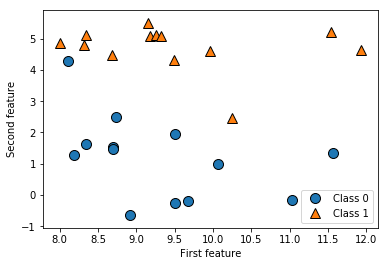

In [2]:
# Generate dataset
X, y = mglearn.datasets.make_forge()
# Plot the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

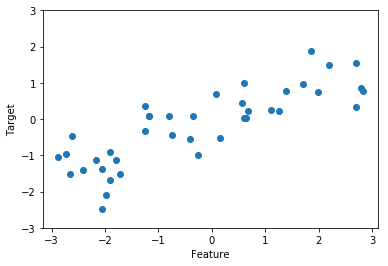

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

print('Shape of cancer data: {}'.format(cancer.data.shape))
print('Sample counts per class:\n{}'.format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print('Feature names:\n{}'.format(cancer.feature_names))

cancer.keys(): 
dict_keys(['DESCR', 'data', 'feature_names', 'target_names', 'target'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'benign': 357, 'malignant': 212}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


In [6]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


# K-Nearest Neighbors

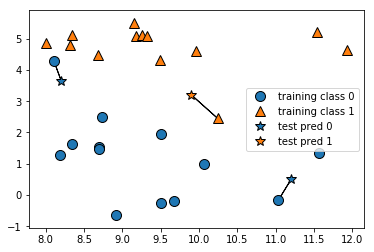

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

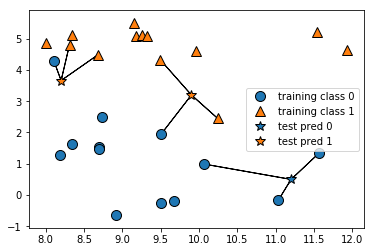

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print('Test set prediction: {}'.format(clf.predict(X_test)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set prediction: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


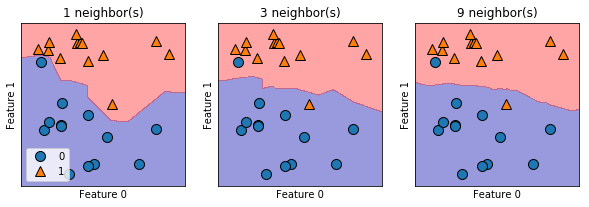

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # The fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

axes[0].legend(loc=3)

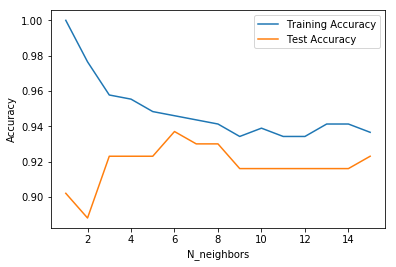

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target
                                                   , stratify=cancer.target,
                                                   random_state=66)
training_accuracy = []
test_accuracy = []
# Try n_neighbors from 1 to 15
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # Record training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generalization/test accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('N_neighbors')
plt.legend()

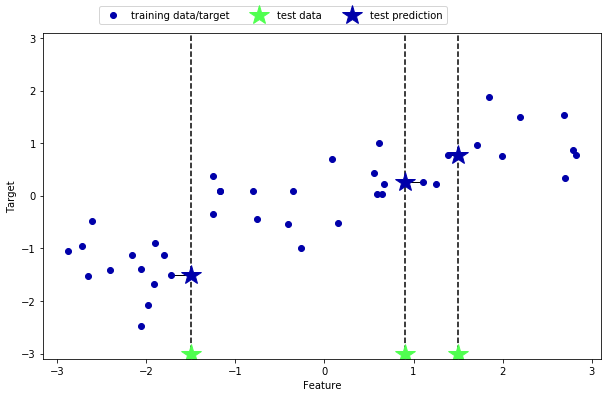

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

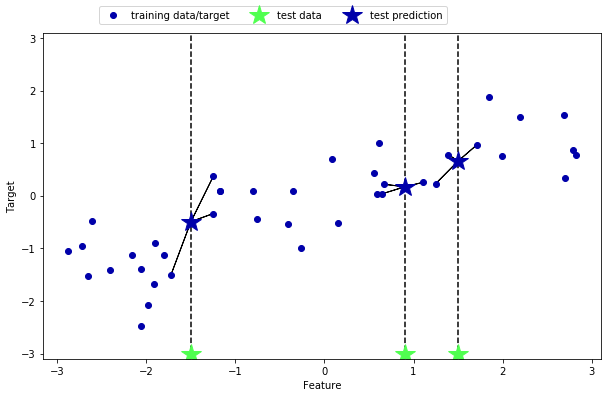

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model and set the number of neighbors to consider 3
clf = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

print('Test set prediction:\n{}'.format(clf.predict(X_test)))
print('Test set R^2: {:.2f}'.format(clf.score(X_test, y_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


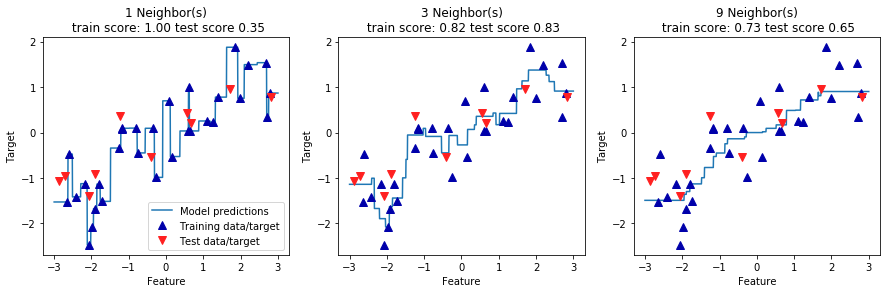

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # Make prediction using 1, 3, or 9 neighbors
    clf = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, clf.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{} Neighbor(s)\n train score: {:.2f} test score {:.2f}'.format(
        n_neighbors, clf.score(X_train, y_train), clf.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target']
              , loc='best')

# Linear Models

/Users/WiNDWAY/anaconda/envs/py35/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


w[0]: 0.393906  b: -0.031804


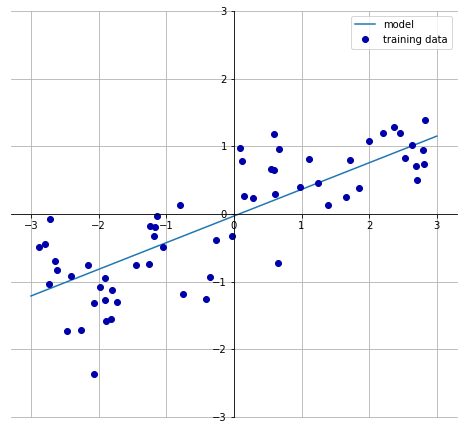

In [17]:
mglearn.plots.plot_linear_regression_wave()

In [18]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print('clf.coef_: {}'.format(lr.coef_))
print('clf.intercept_: {}'.format(lr.intercept_))
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

clf.coef_: [ 0.39390555]
clf.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [19]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [20]:
from sklearn.linear_model import Ridge

clf = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [21]:
clf_10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(clf_10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [22]:
clf_01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(clf_01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


#### RidgeRegression has L2 regularization with the variable alpha. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but help generalization.

#### More alpha = More restriction, simpler model

#### Less alpha = Less restriction, complex model

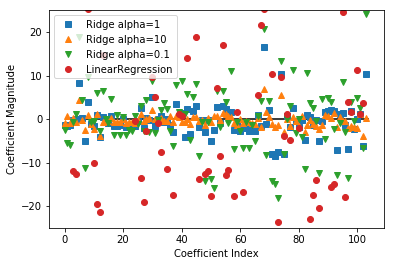

In [23]:
plt.plot(clf.coef_, 's', label='Ridge alpha=1')
plt.plot(clf_10.coef_, '^', label='Ridge alpha=10')
plt.plot(clf_01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

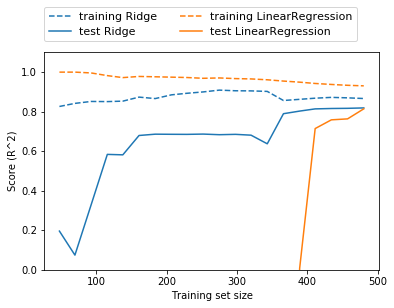

In [24]:
mglearn.plots.plot_ridge_n_samples()

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [26]:
# We increase the default setting of 'max_iter',
# Otherwise the model would warn us that we should increase max_iter

lasso_001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso_001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso_001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso_001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [27]:
lasso_00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso_00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso_00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso_00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


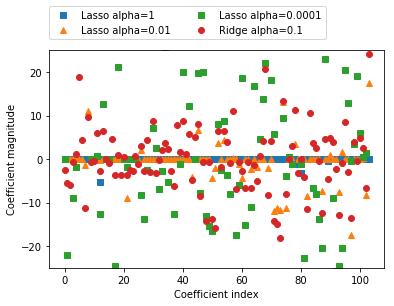

In [28]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso_001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso_00001.coef_, 's', label='Lasso alpha=0.0001')

plt.plot(clf_01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

# Logistic model and SVM

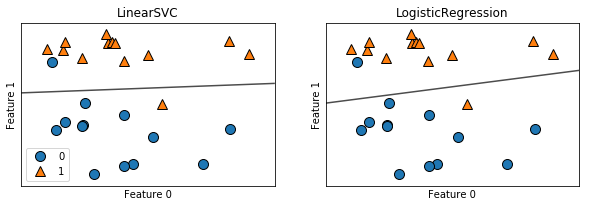

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

axes[0].legend()

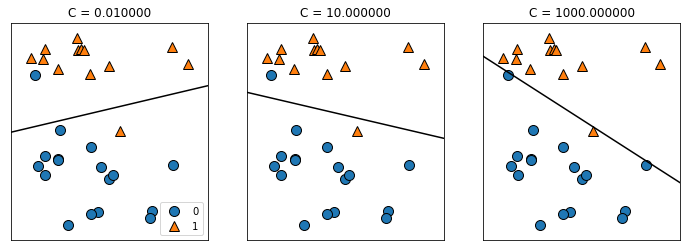

In [30]:
mglearn.plots.plot_linear_svc_regularization()

In [31]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg_clf = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg_clf.score(X_test, y_test)))

logreg_clf_100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg_clf_100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg_clf_100.score(X_test, y_test)))

logreg_clf_001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg_clf_001.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg_clf_001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958
Training set score: 0.974
Test set score: 0.965
Training set score: 0.934
Test set score: 0.930


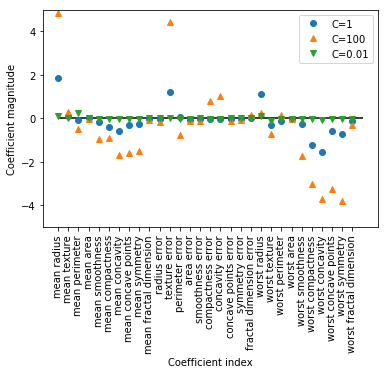

In [32]:
plt.plot(logreg_clf.coef_.T, 'o', label='C=1')
plt.plot(logreg_clf_100.coef_.T, '^', label='C=100')
plt.plot(logreg_clf_001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


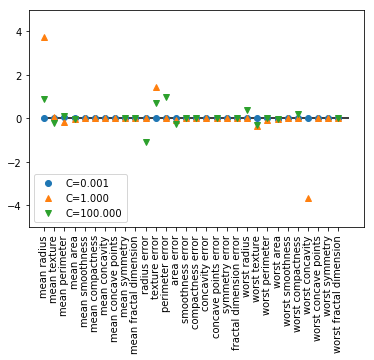

In [33]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('Training accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(
        C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.legend(loc=3)

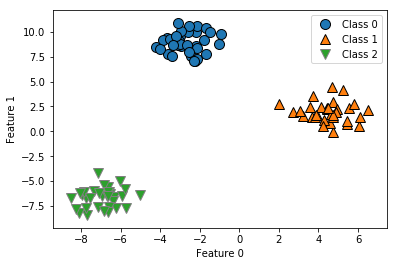

In [34]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


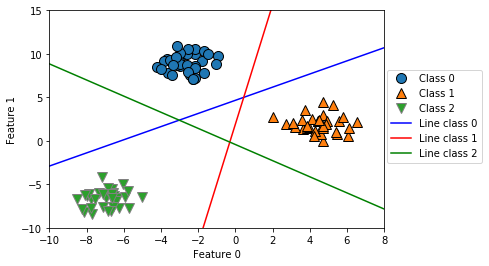

In [35]:
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape)
print('Intercept shape: ', linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
           'Line class 2'], loc=(1.01, 0.3))

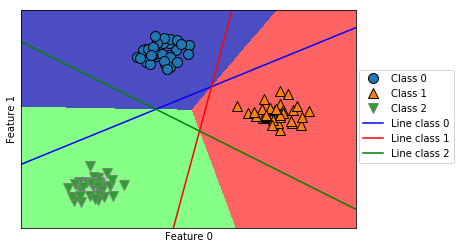

In [36]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
           'Line class 2'], loc=(1.01, 0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression.

#### Large values for alpha or small values for C mean simple models.

# Naive Bayes

In [37]:
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [38]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# Decision Trees

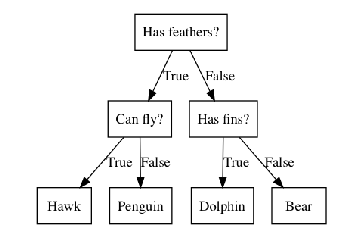

In [39]:
mglearn.plots.plot_animal_tree()

In [40]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [41]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


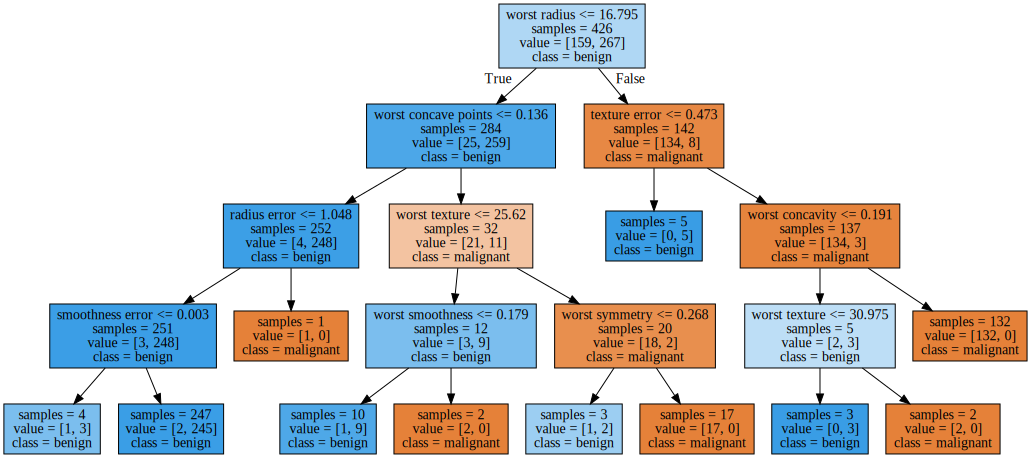

In [42]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [43]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


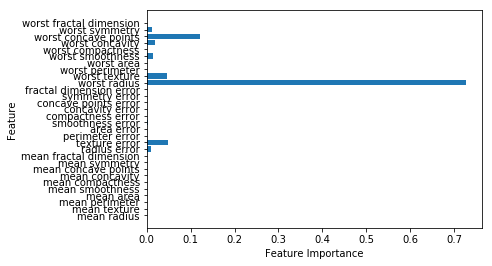

In [44]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


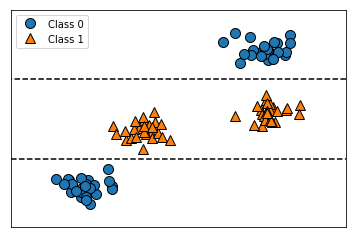

In [45]:
tree = mglearn.plots.plot_tree_not_monotone()

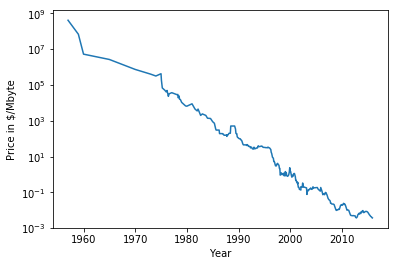

In [46]:
import pandas as pd

ram_prices = pd.read_csv('ram_price.csv')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [47]:
from sklearn.tree import DecisionTreeRegressor
# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Predict prices based on date
X_train = data_train.date[:, np.newaxis]
# We use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# Predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# Undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

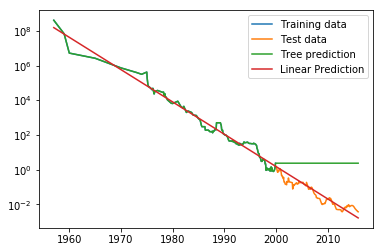

In [48]:
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear Prediction')
plt.legend()

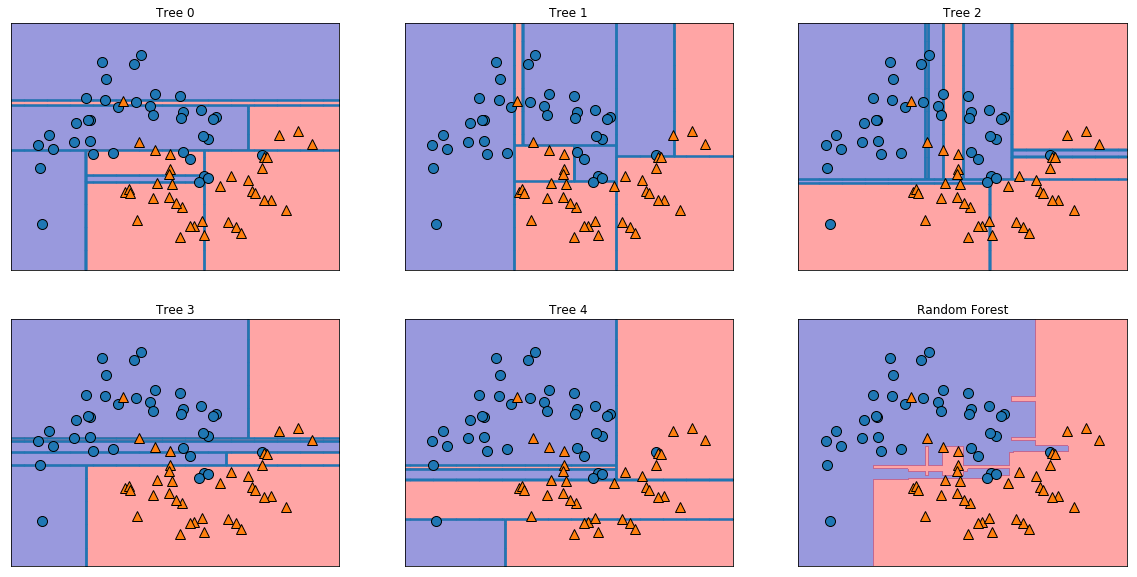

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                               alpha=0.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


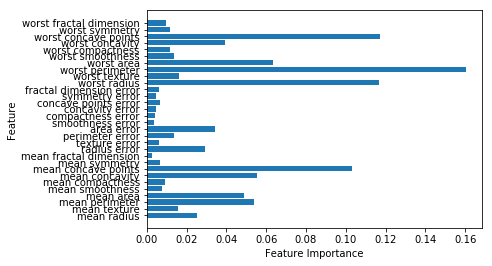

In [51]:
plot_feature_importances_cancer(forest)

#### In general, it’s a good rule of thumb to use the default values: max_features=sqrt(n_features) for classification and max_features=log2(n_features) for regression

Accuracy on training set: 1.000
Accuracy on test set: 0.958
Accuracy on training set: 0.991
Accuracy on test set: 0.972
Accuracy on training set: 0.988
Accuracy on test set: 0.965


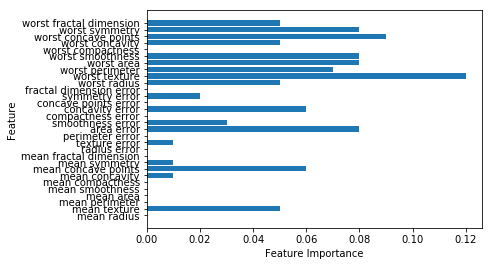

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

# Kernelized Support Vector Machines

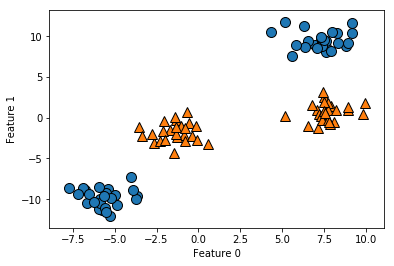

In [53]:
X,y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

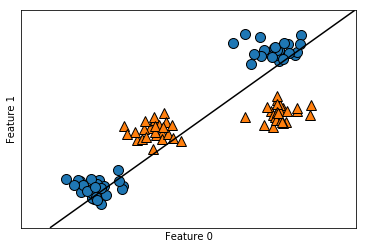

In [54]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

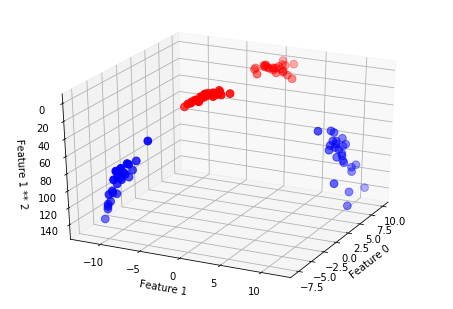

In [55]:
# Add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# Visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# Plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1 ** 2')

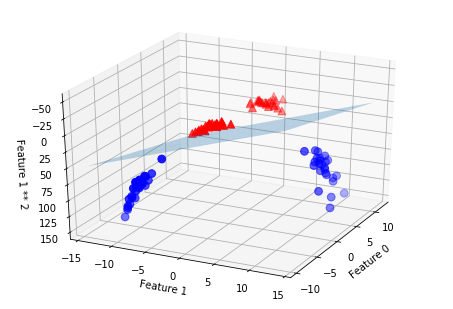

In [56]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', 
          cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', 
          marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 1 ** 2')

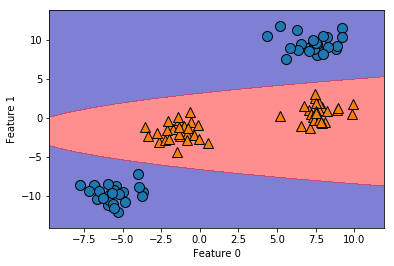

In [57]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), 
                                           YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

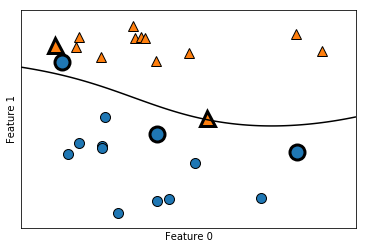

In [58]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Plot support vectors
sv = svm.support_vectors_
# Class lables of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

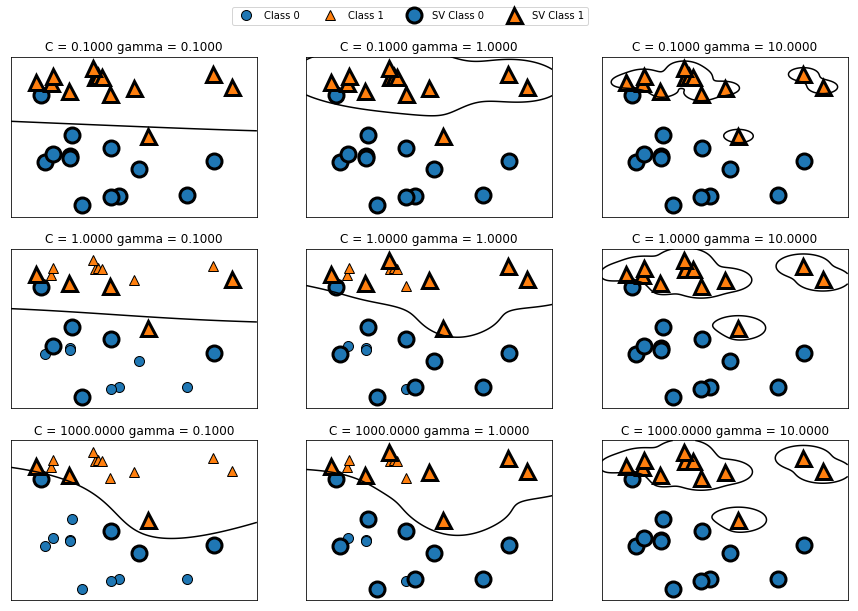

In [59]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(['Class 0', 'Class 1', 'SV Class 0', 'SV Class 1'],
                 ncol=4, loc=(0.9, 1.2))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print('Accuracy on training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


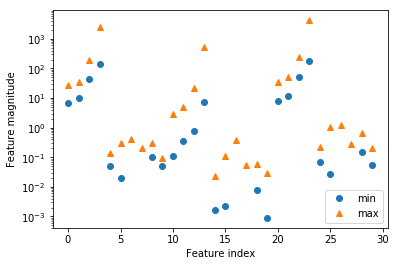

In [61]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.yscale('log')

In [62]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# Subtract the min, and divide by range
# Afterward, min=0, and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print('Minimum for each feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum for each feature\n{}'.format(X_train_scaled.max(axis=0)))

# Use the same transformation on the test set
# Using min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [63]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951
Accuracy on training set: 0.988
Accuracy on test set: 0.972


# Neural Networks (MLP)

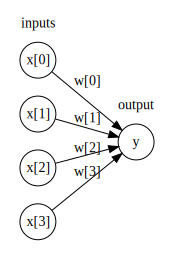

In [64]:
from IPython.display import display

display(mglearn.plots.plot_logistic_regression_graph())

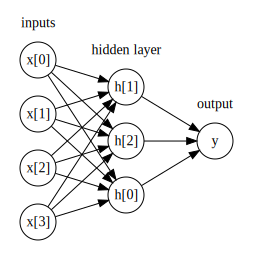

In [65]:
display(mglearn.plots.plot_single_hidden_layer_graph())

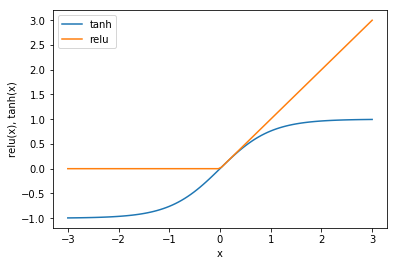

In [66]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

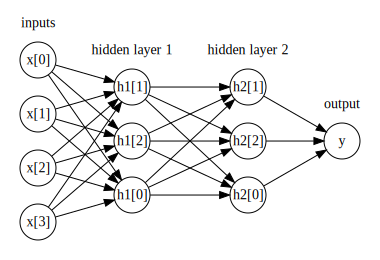

In [67]:
mglearn.plots.plot_two_hidden_layer_graph()

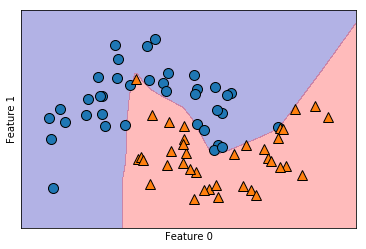

In [68]:
from sklearn.neural_network import MLPClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

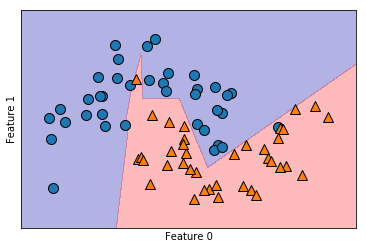

In [69]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

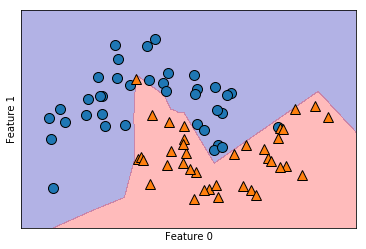

In [70]:
# Using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

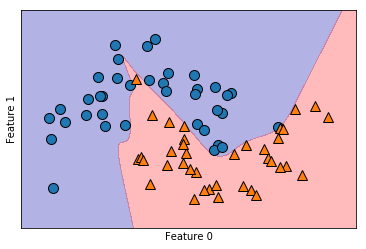

In [71]:
# Using two hidden layers, with 10 units each and tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', 
                    activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

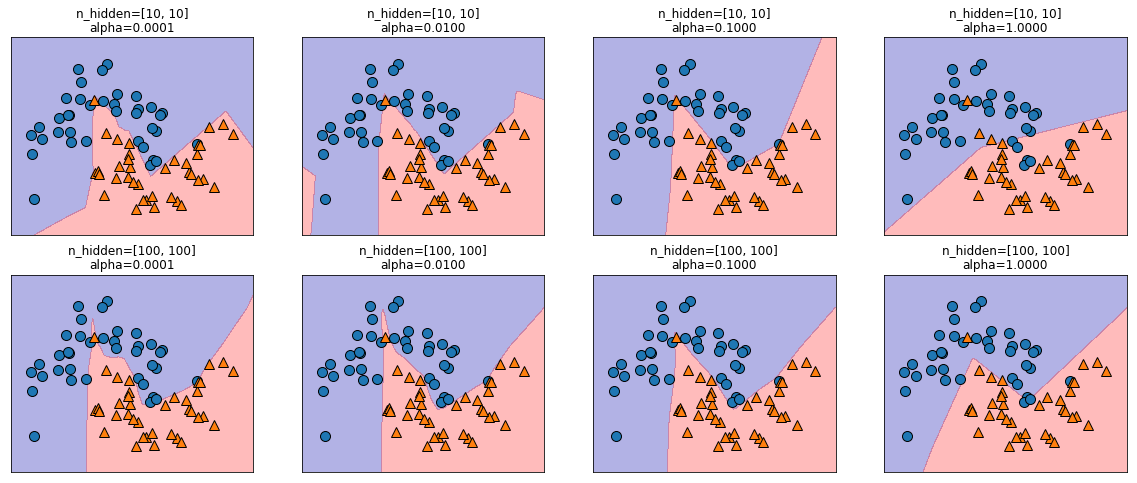

In [72]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(
            n_hidden_nodes, n_hidden_nodes, alpha))

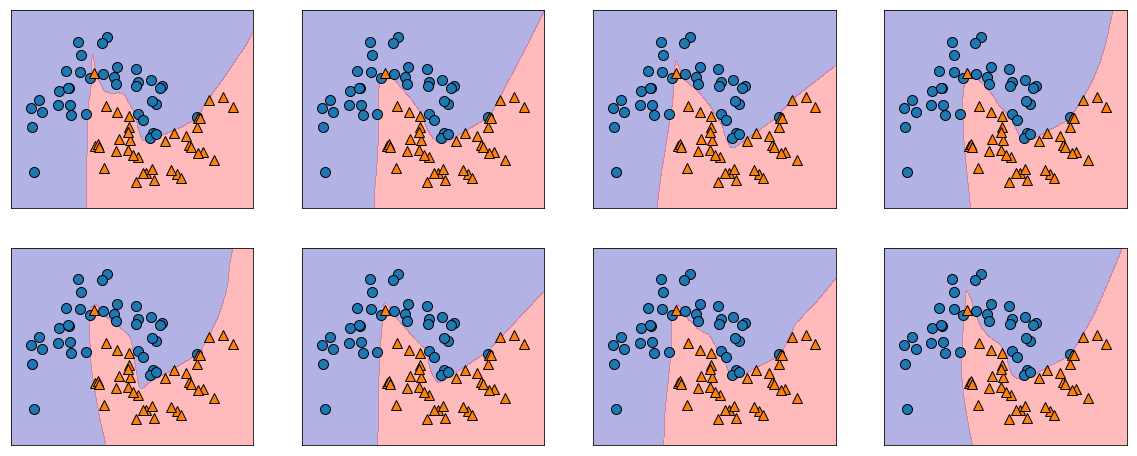

In [73]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, 
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3,
                                   ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [74]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy on training set: {:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


In [76]:
# Compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# Compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# Subtract the mean and scale by inverse standard deviation
# Afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# Use the same transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(
    mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/WiNDWAY/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [77]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(
    mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


In [78]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(
    mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


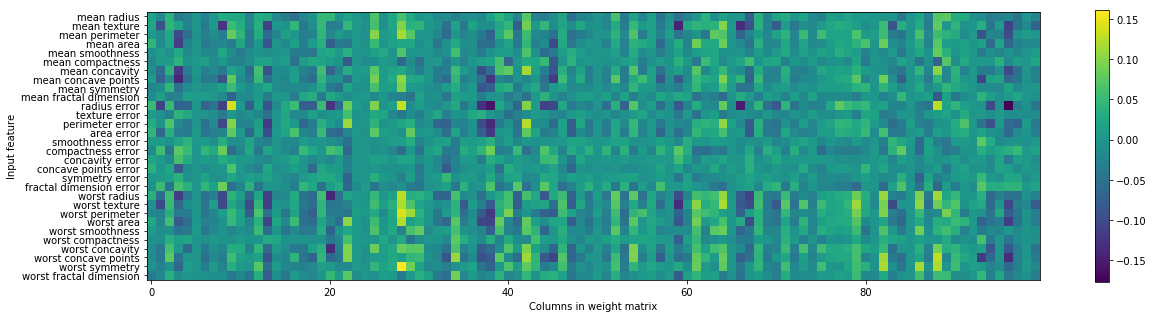

In [79]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# We rename the class 'blue' and 'red' for illustration purposes
y_named = np.array(['blue', 'red'])[y]

# We can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(
X, y_named, y, random_state=0)

# Build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print('X_test.shape: {}'.format(X_test.shape))
print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))

# Show the first few entries of decision_function
print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6]))

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [81]:
print('Thresholded decision function: \n{}'.format(gbrt.decision_function(X_test) > 0))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Thresholded decision function: 
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [82]:
# Make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# Use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print('pred is equal to predictions: {}'.format(np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [83]:
decision_function = gbrt.decision_function(X_test)
print('Decision function minimum: {:.2f} maximum: {:.2f}'.format(
    np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


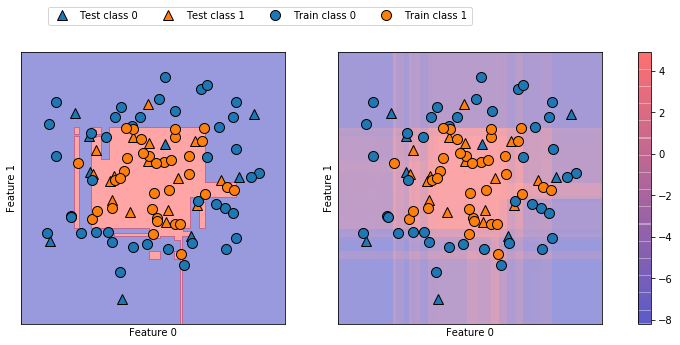

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=0.4, fill=True,
                               cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=0.4,
                                           cm=mglearn.ReBl)

for ax in axes:
    # Plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^',
                             ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o',
                             ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(['Test class 0', 'Test class 1', 'Train class 0', 'Train class 1'],
              ncol=4, loc=(0.1, 1.1))

In [85]:
print('Shape of probabilities: {}'.format(gbrt.predict_proba(X_test).shape))

# Show the first few entries of predict_proba
print('Predicted probabilities:\n{}'.format(gbrt.predict_proba(X_test[:6])))

Shape of probabilities: (25, 2)
Predicted probabilities:
[[ 0.01573626  0.98426374]
 [ 0.84575649  0.15424351]
 [ 0.98112869  0.01887131]
 [ 0.97406775  0.02593225]
 [ 0.01352142  0.98647858]
 [ 0.02504637  0.97495363]]


In [86]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print('Decision function shape: {}'.format(gbrt.decision_function(X_test).shape))
# Plot the first few entries of the decision function
print('Decision function:\n{}'.format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [87]:
print('Argmax of decision function:\n{}'.format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [88]:
# Show the first few entries of predict_proba
print('Predicted probabilities:\n{}'.format(gbrt.predict_proba(X_test)[:6]))
# Show that sums across rows are one
print('Sums: {}'.format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))
print('Argmax of predicted probabilities:\n{}'.format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print('Predictions:\n{}'.format(gbrt.predict(X_test)))

Predicted probabilities:
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]]
Sums: [ 1.  1.  1.  1.  1.  1.]
Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [89]:
logreg = LogisticRegression()

# Represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print('Unique classes in training data: {}'.format(logreg.classes_))
print('Predictions: {}'.format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('Argmax of decision function: {}'.format(argmax_dec_func[:10]))
print('Argmax combined with classes_: {}'.format(logreg.classes_[argmax_dec_func][:10]))

Unique classes in training data: ['setosa' 'versicolor' 'virginica']
Predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
Argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
Argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
